#### Baseball Case Study

#### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [27]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
# READING THE CSV FILE:
data = pd.read_csv("baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This is a dataset of 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different independent variables. There are 17 columns, where 16 columns are the Independent Variables (Feature), where all 15 out of 16 columns are containing integer type of data and 1 column consist of float type of data. Lastly, 'W' is the Dependent Variable column (Label). As the label consists of continuous value it's a Regression Problem.
- Independent Variables : Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), Complete Games(CG) and Errors(E).
- Dependent Variable : Wins(W).

In [322]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

- As we can see W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E all these columns consist of integers, only the column ERA is containing Float type of value. There is no column containing Nominal value in this dataset.

In [323]:
data.shape

(30, 17)

- Dataset has 30 rows and 17 columns.

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- As we can see there are Only one column is containing Float value (ERA) and rest of the columns are containing Integers only.
- Count of each independent variable is 30, So, there is no missing value present in the dataset.

In [325]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

- 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E' these are the columns that are present in this dataset.

Let's check the statistics of the dataset:

In [216]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


- We can see as the count of each value is 30, so there is no missing value present. 
- Standard deviation of 3B is big, we can confirm the shewness after chcking the visualization.
- The gap between 75% quartile and max of 'SO' is bigger than previous quartiles' gaps, we need to check it and will deal with it.
- The minimum value of CG is zero, we need to deal with it before model creation.

Let's check the Skewness of the dataset:

In [217]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

- As we can see there is skewness in 'R','H','CG','SHO','SV','E' columns.

Now let's check the null values as well:

In [326]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

- There is no missing value present in the dataset.

#### Data Analysis and Visualization :
 
 We will Analyze the dataset in multiple ways using Univariate analysis(we will check the distribution and detect the outliers), Bivariate analysis(we will check the relations between features vs label) and Multivariate Analysis (We will check the multicolinearity between features).

#### Univariate Analysis:

In this section we will check the distribution of each variable.

Let's check the Fequency of Label column before checking features:

Text(0.5, 1.0, 'Frequency of Wins')

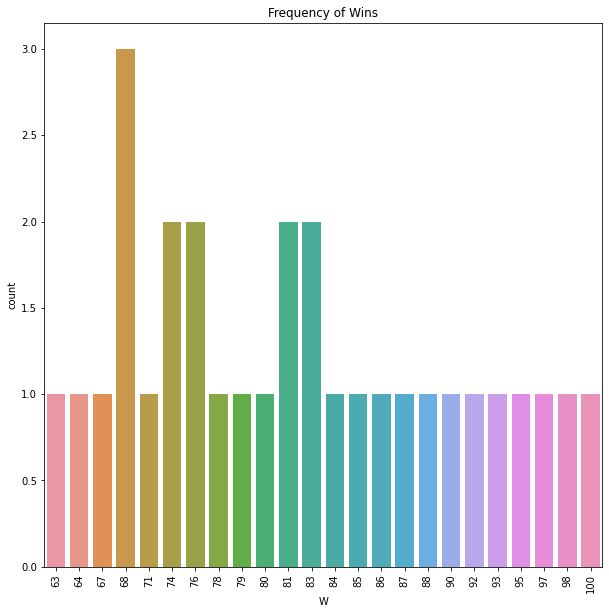

In [328]:
plt.figure(figsize=(10,10))
sns.countplot(data['W'])
plt.xticks(rotation=90)
plt.title('Frequency of Wins')

- As we can see 68 is showing the highest winning frequency, following that 74, 76 ,81 and 83 are showing 2nd highest frequency.

Let's check the distribution of Independent Variables:

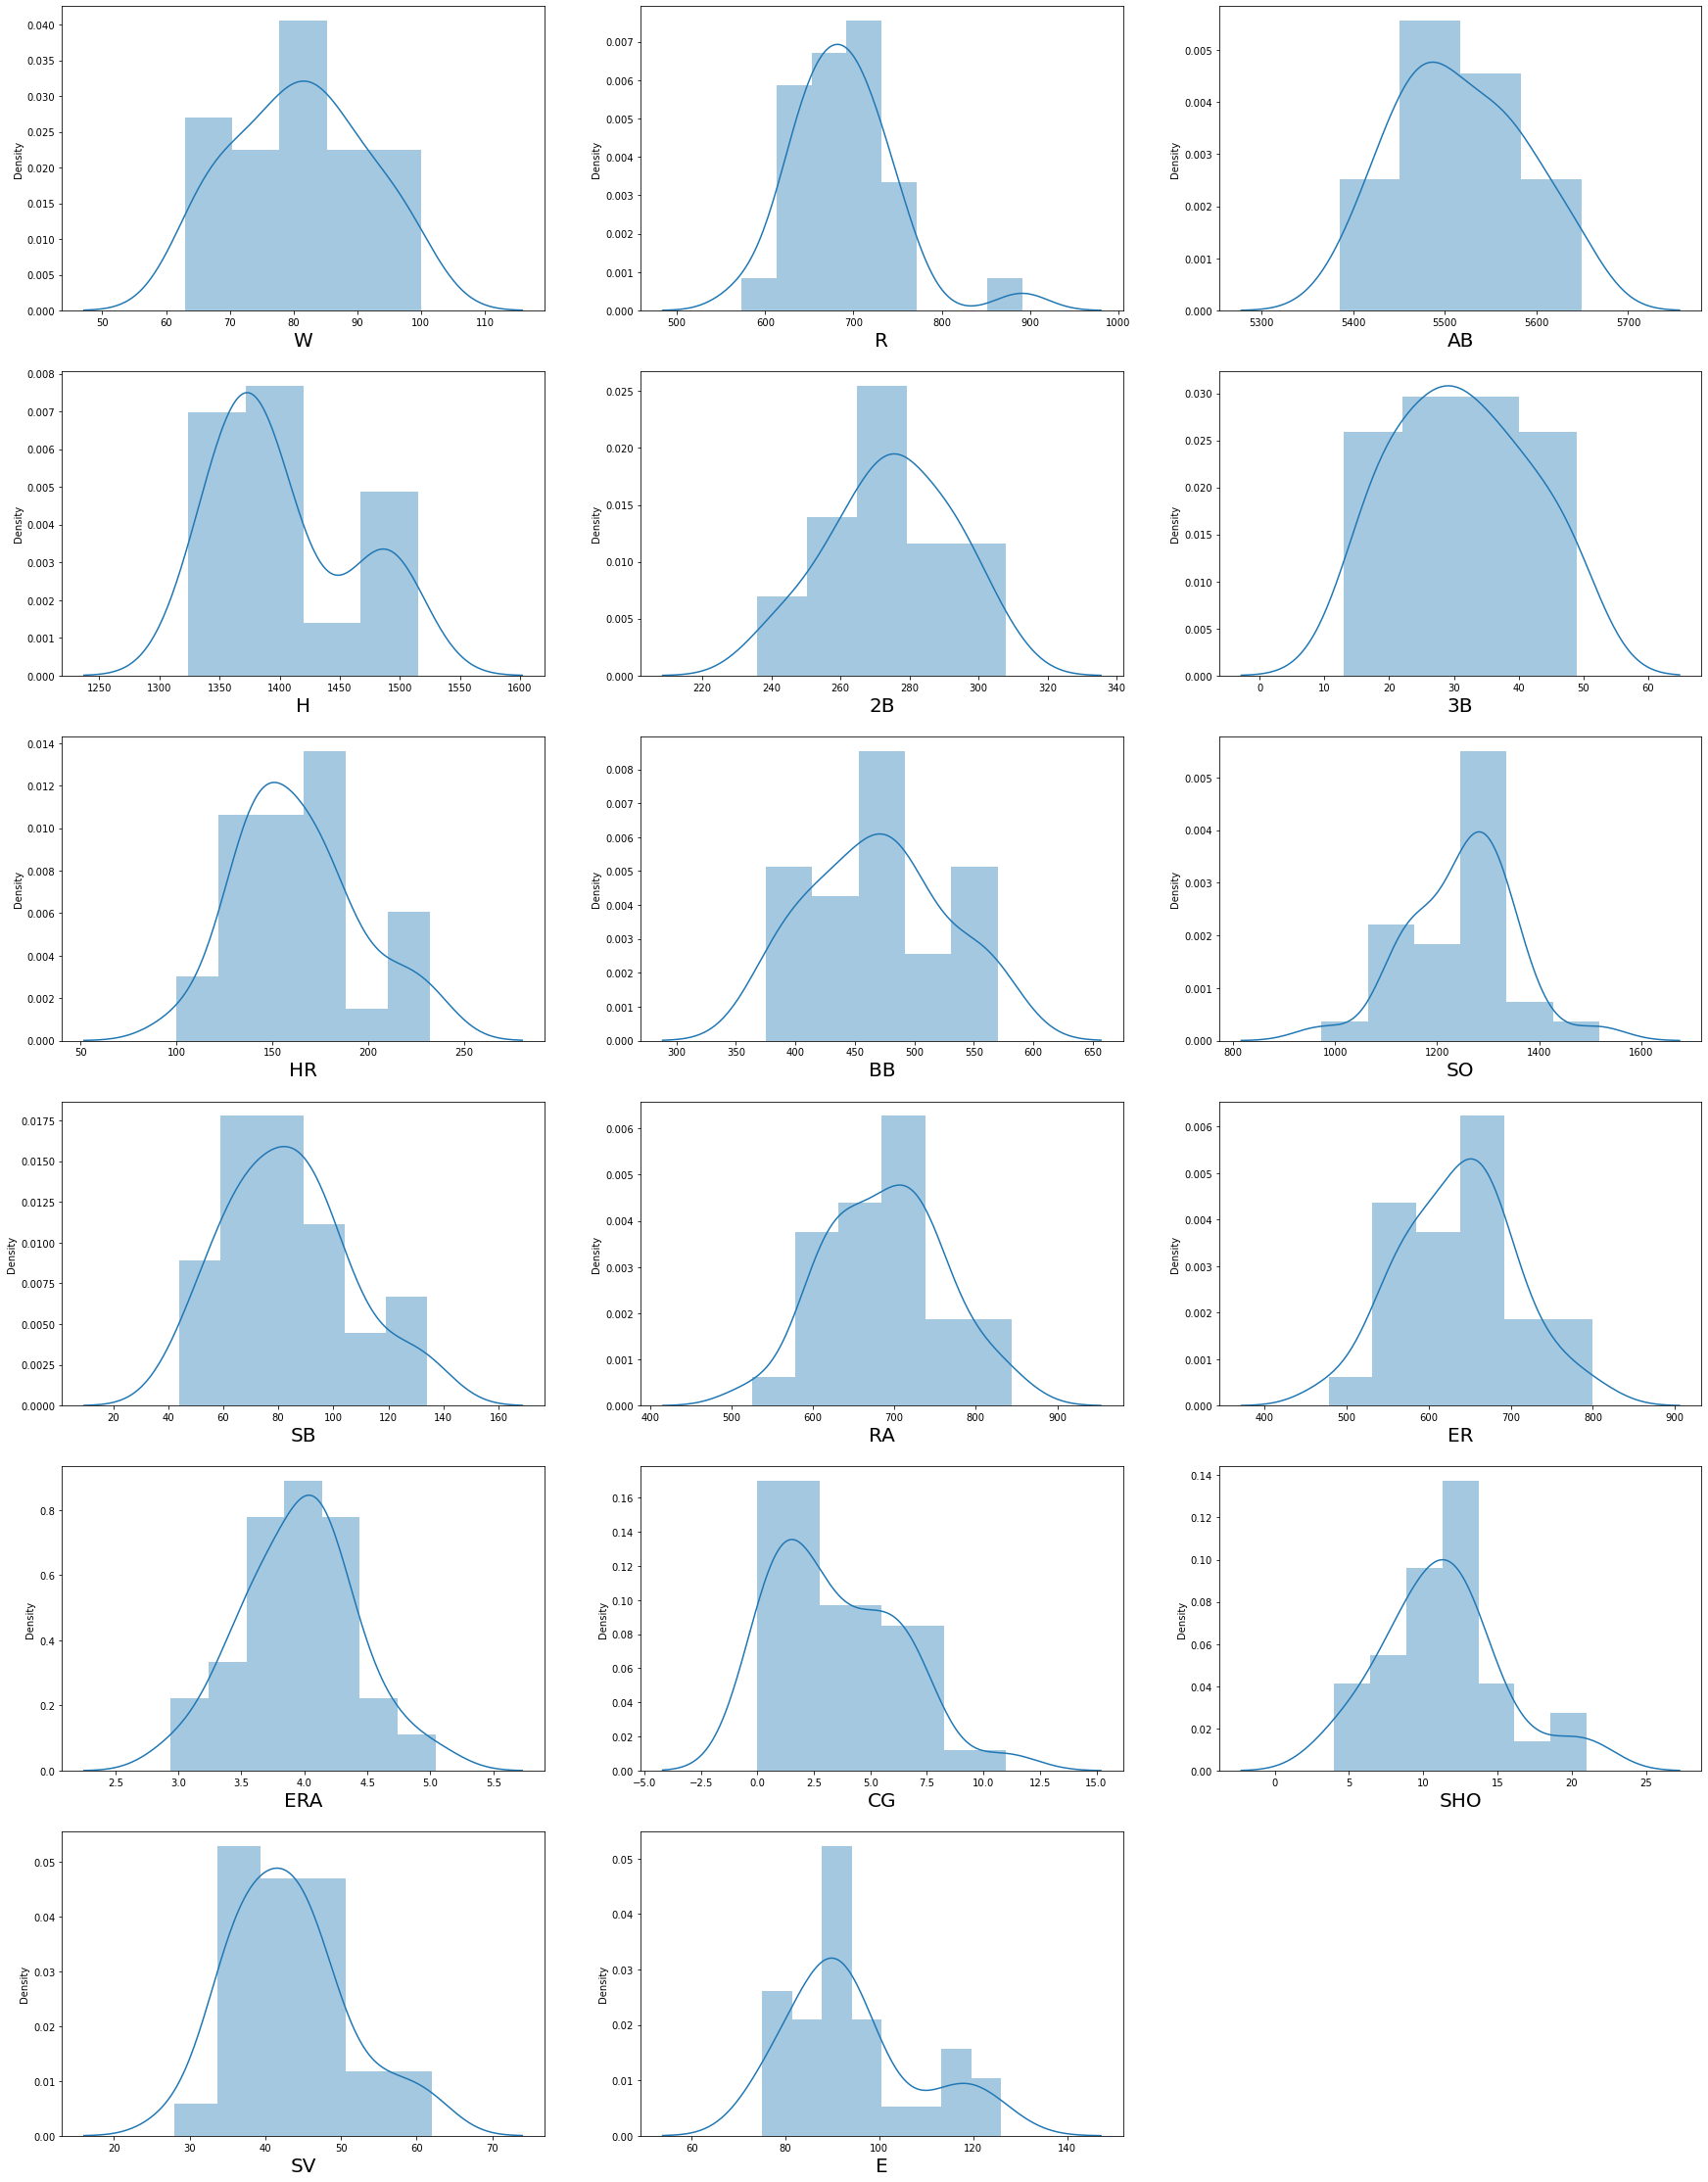

In [329]:
plt.figure(figsize=(30,40),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- From the distplot we can see skewness in 'R','H','SO','CG','SHO' and 'E'. We will remove the skewness during the data cleaning process. 


Now let's Check the Outliers as well: 

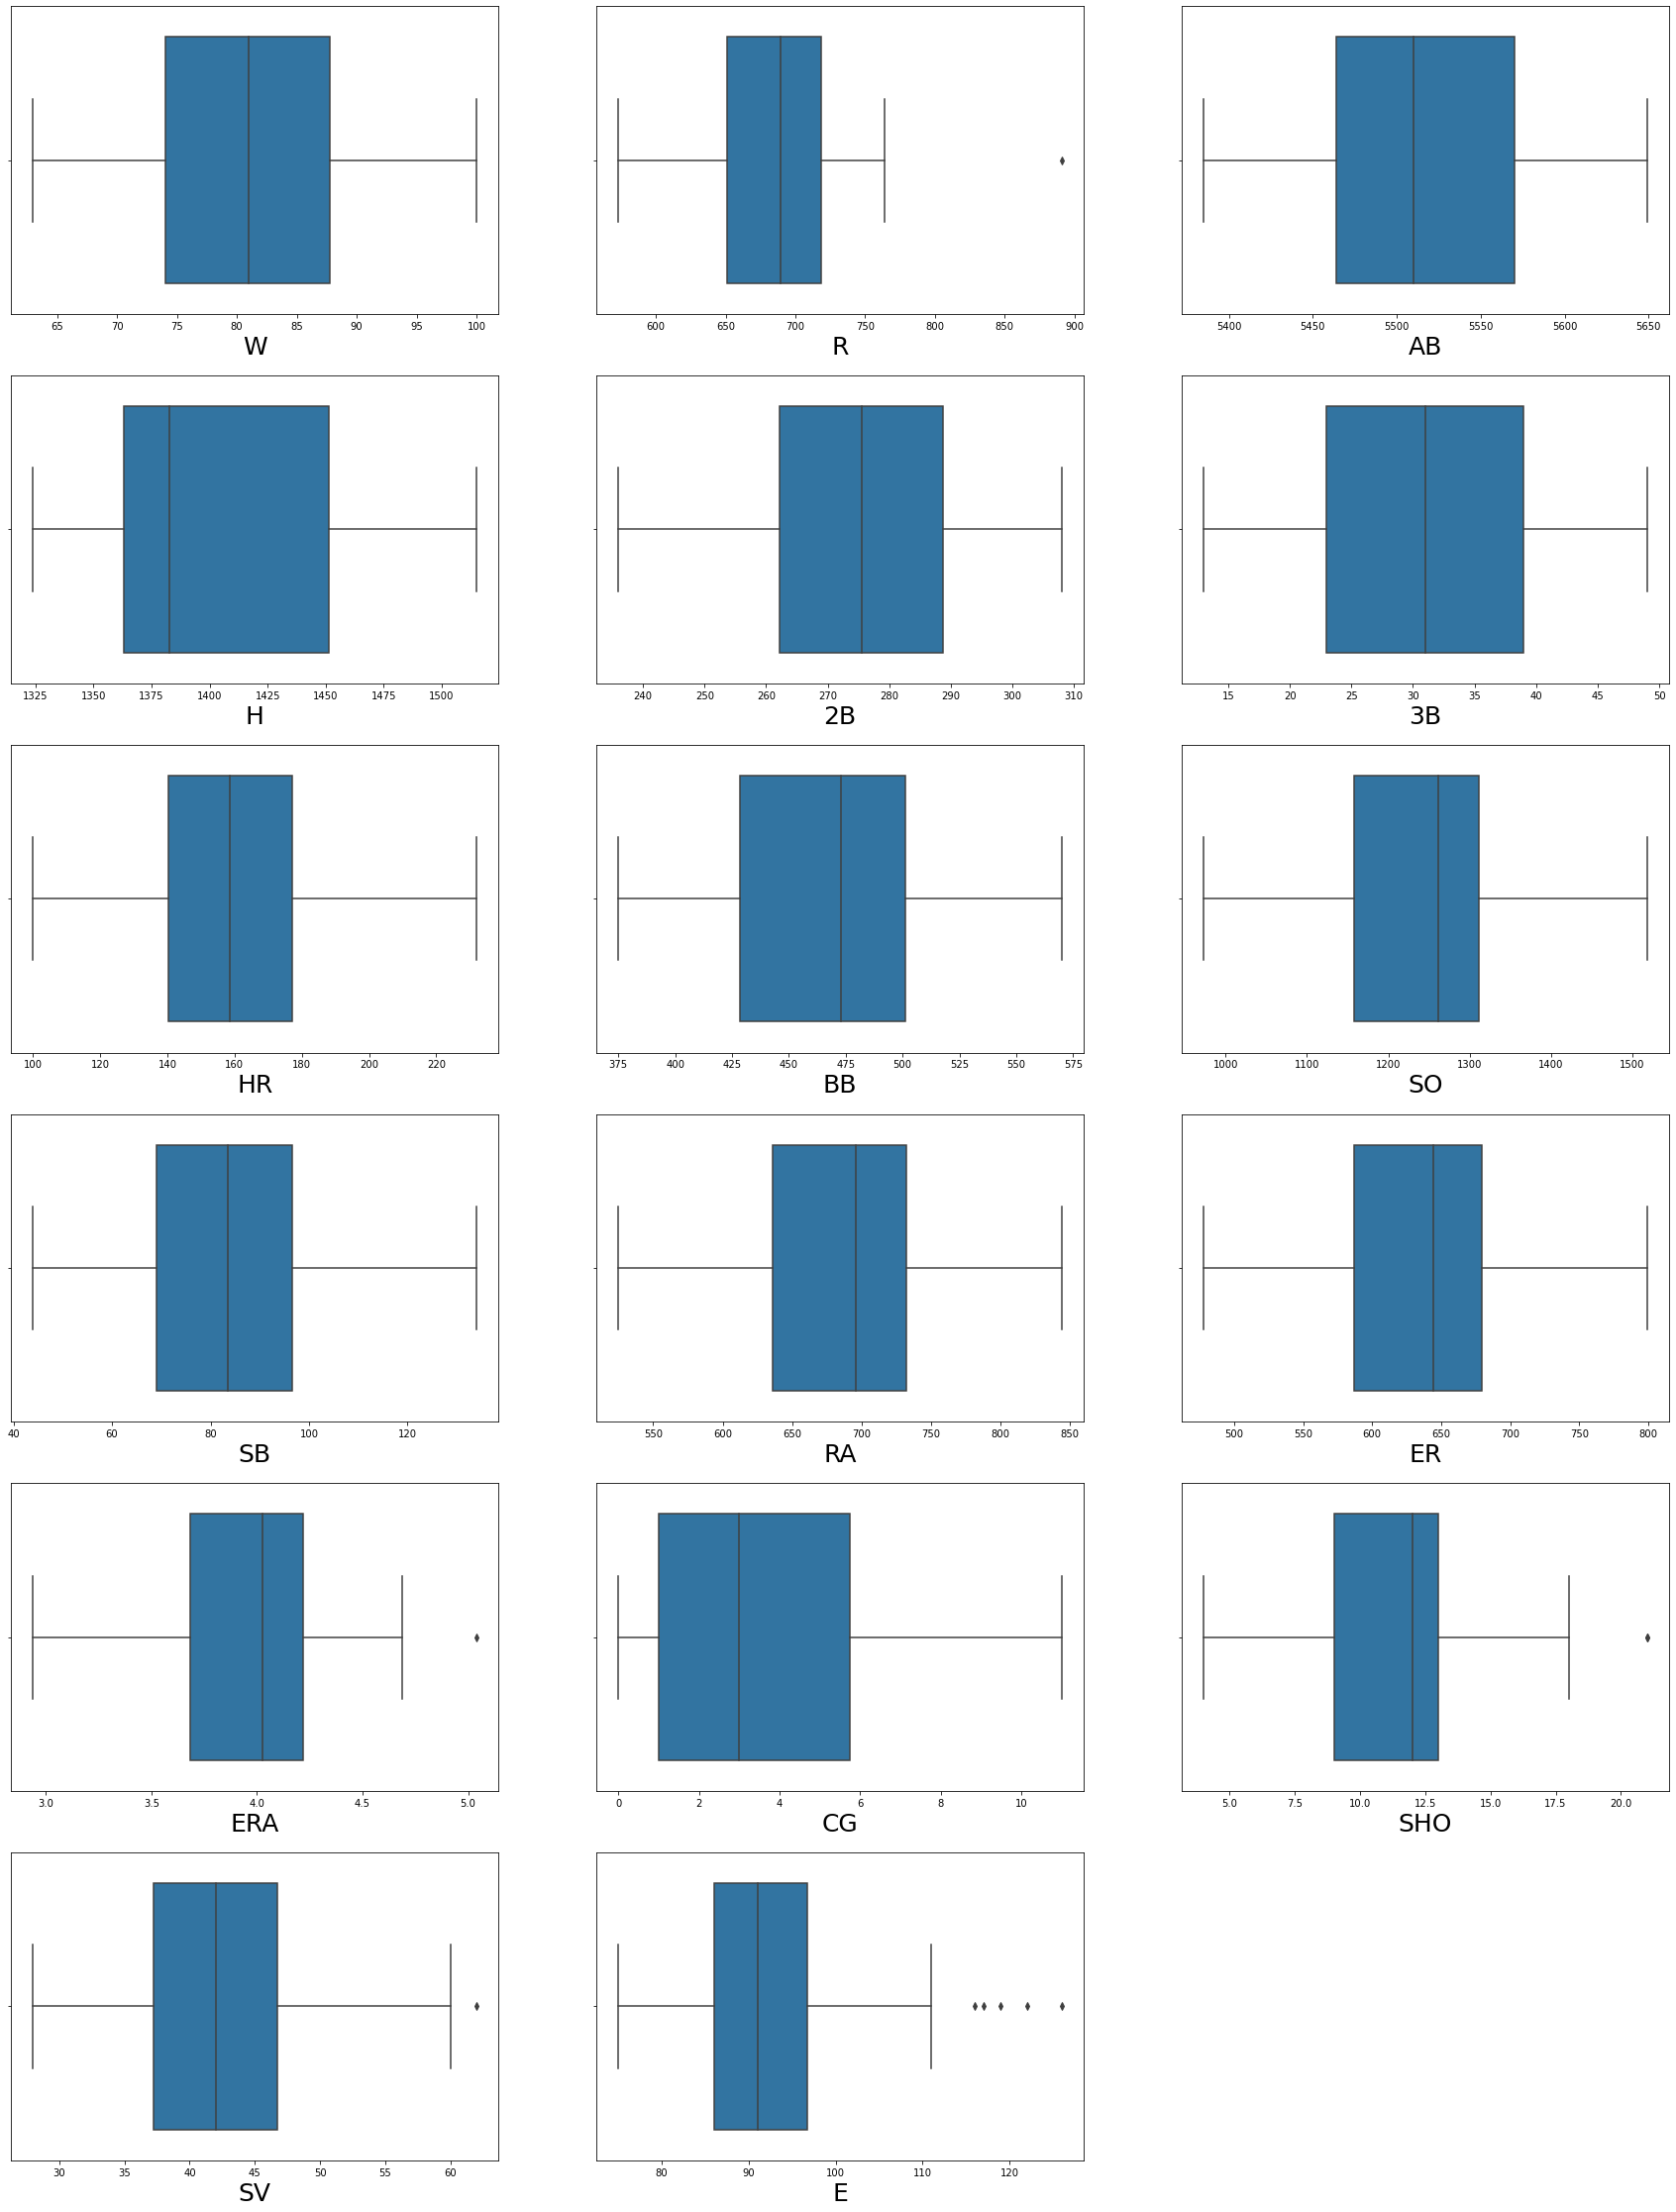

In [330]:
plt.figure(figsize=(30,40),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

- As we can see there is little bit of outliers are present in different features,like: 'R','ERA','SHO','SV' and 'E'. And there is some deviation in CG as well. We need to take care of these during data cleaning.


#### Bivariate Analysis:
Now it's time to check the relations of Dependent and Independent variable as well :

In [10]:
y = data['W']           #dividing the dataset into features and labels for checking the relationship
x = data.drop(columns=['W'])

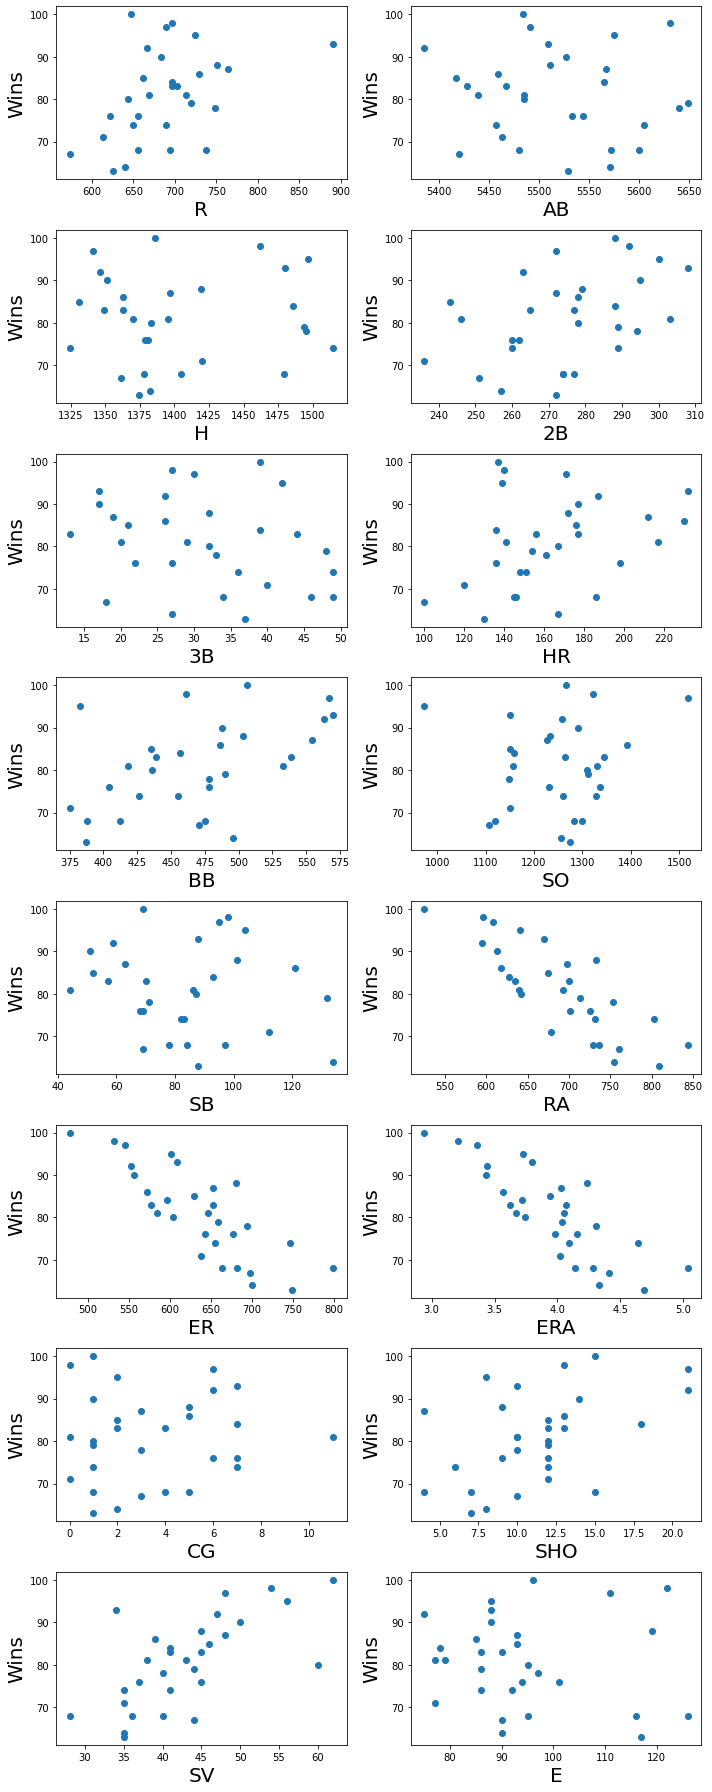

In [20]:
plt.figure(figsize=(10,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnumber+=1
plt.tight_layout()  

- As we can see, 'R' , 'SV' has somewhat positive linear relation with W. Whereas 'RA','ER','ERA' are having negative linear relation with 'W'.

Let's check the relation once again:

<AxesSubplot:xlabel='R', ylabel='W'>

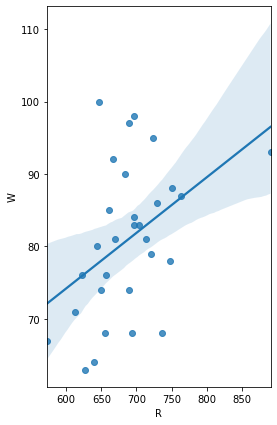

In [331]:
plt.figure(figsize=(4,7))
sns.regplot(x="R", y="W", data=data)

- As we can see Runs has a positive linear relation with Wins.

<AxesSubplot:xlabel='AB', ylabel='W'>

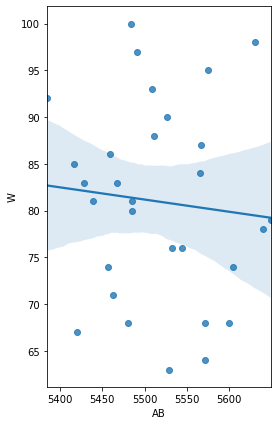

In [332]:
plt.figure(figsize=(4,7))
sns.regplot(x="AB", y="W", data=data)

- The relation between At Bats And Wins is not prominent.

<AxesSubplot:xlabel='H', ylabel='W'>

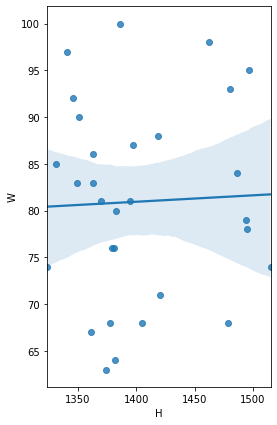

In [333]:
plt.figure(figsize=(4,7))
sns.regplot(x="H", y="W", data=data)

- The relation between Hits And Wins is not prominent.

<AxesSubplot:xlabel='2B', ylabel='W'>

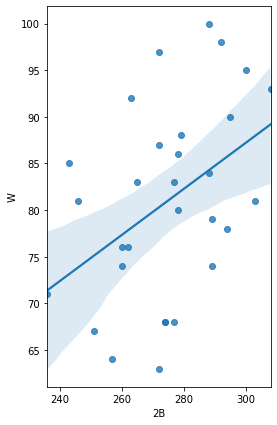

In [334]:
plt.figure(figsize=(4,7))
sns.regplot(x="2B", y="W", data=data)

- The relation between Doubles And Wins is positive and it is more or less prominent.

<AxesSubplot:xlabel='3B', ylabel='W'>

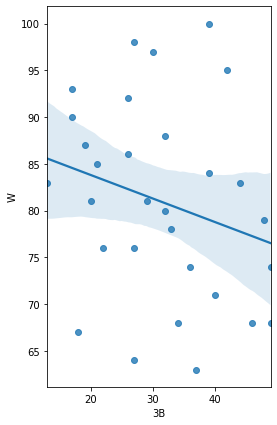

In [335]:
plt.figure(figsize=(4,7))
sns.regplot(x="3B", y="W", data=data)

- The relation between Triples And Wins is not prominent.

<AxesSubplot:xlabel='HR', ylabel='W'>

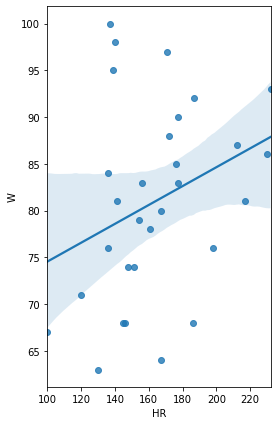

In [336]:
plt.figure(figsize=(4,7))
sns.regplot(x="HR", y="W", data=data)

- The relation between Homeruns And Wins is somewhat positively linear.

<AxesSubplot:xlabel='BB', ylabel='W'>

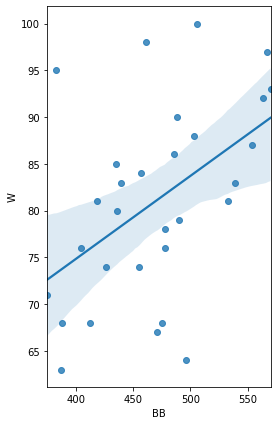

In [337]:
plt.figure(figsize=(4,7))
sns.regplot(x="BB", y="W", data=data)

- The relation between Walks And Wins is somewhat positively linear.

<AxesSubplot:xlabel='SO', ylabel='W'>

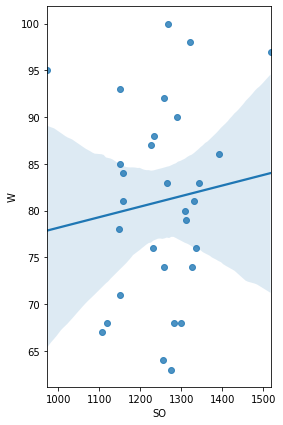

In [338]:
plt.figure(figsize=(4,7))
sns.regplot(x="SO", y="W", data=data)

- The relation between Strikeouts And Wins is somewhat positively linear.

<AxesSubplot:xlabel='SB', ylabel='W'>

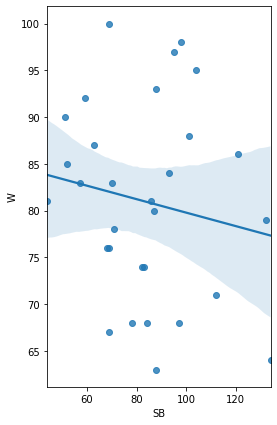

In [339]:
plt.figure(figsize=(4,7))
sns.regplot(x="SB", y="W", data=data)

- The relation between Stolen Bases And Wins is somewhat Scattered.

<AxesSubplot:xlabel='RA', ylabel='W'>

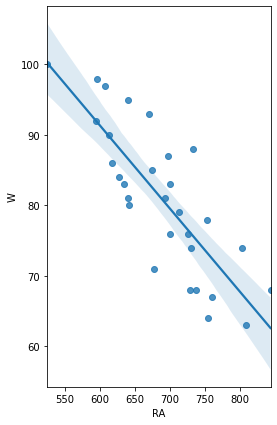

In [340]:
plt.figure(figsize=(4,7))
sns.regplot(x="RA", y="W", data=data)

- The relation between Runs Allowed And Wins is negatively linear.  

<AxesSubplot:xlabel='ER', ylabel='W'>

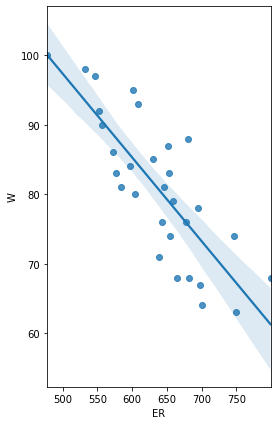

In [21]:
plt.figure(figsize=(4,7))
sns.regplot(x="ER", y="W", data=data)

- The relation between Earned Runs And Wins is negatively linear.

<AxesSubplot:xlabel='ERA', ylabel='W'>

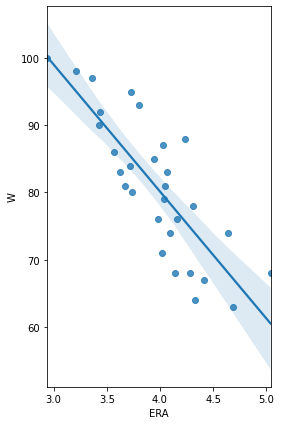

In [341]:
plt.figure(figsize=(4,7))
sns.regplot(x="ERA", y="W", data=data)

- The relation between Earned Runs Avarage And Wins is negatively linear. 

<AxesSubplot:xlabel='CG', ylabel='W'>

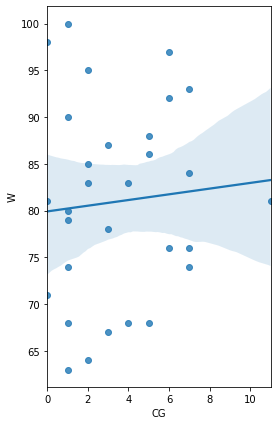

In [342]:
plt.figure(figsize=(4,7))
sns.regplot(x="CG", y="W", data=data)

- The relation between Complete Games And Wins is somewhat scattered. 

<AxesSubplot:xlabel='SHO', ylabel='W'>

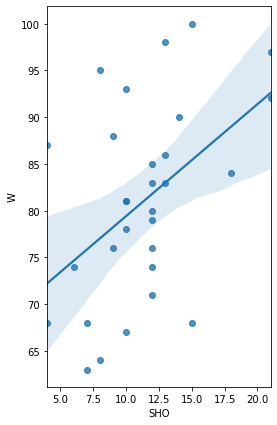

In [343]:
plt.figure(figsize=(4,7))
sns.regplot(x="SHO", y="W", data=data)

- The relation between Shutouts And Wins is somewhat linear. 

<AxesSubplot:xlabel='SV', ylabel='W'>

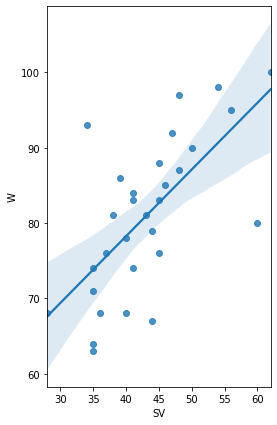

In [344]:
plt.figure(figsize=(4,7))
sns.regplot(x="SV", y="W", data=data)

- The relation between Saves And Wins is somewhat positively linear. 

<AxesSubplot:xlabel='E', ylabel='W'>

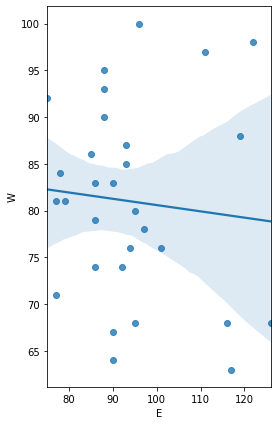

In [345]:
plt.figure(figsize=(4,7))
sns.regplot(x="E", y="W", data=data)

- The relation between Error And Wins is somewhat scattered. 

#### Multivariate Analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

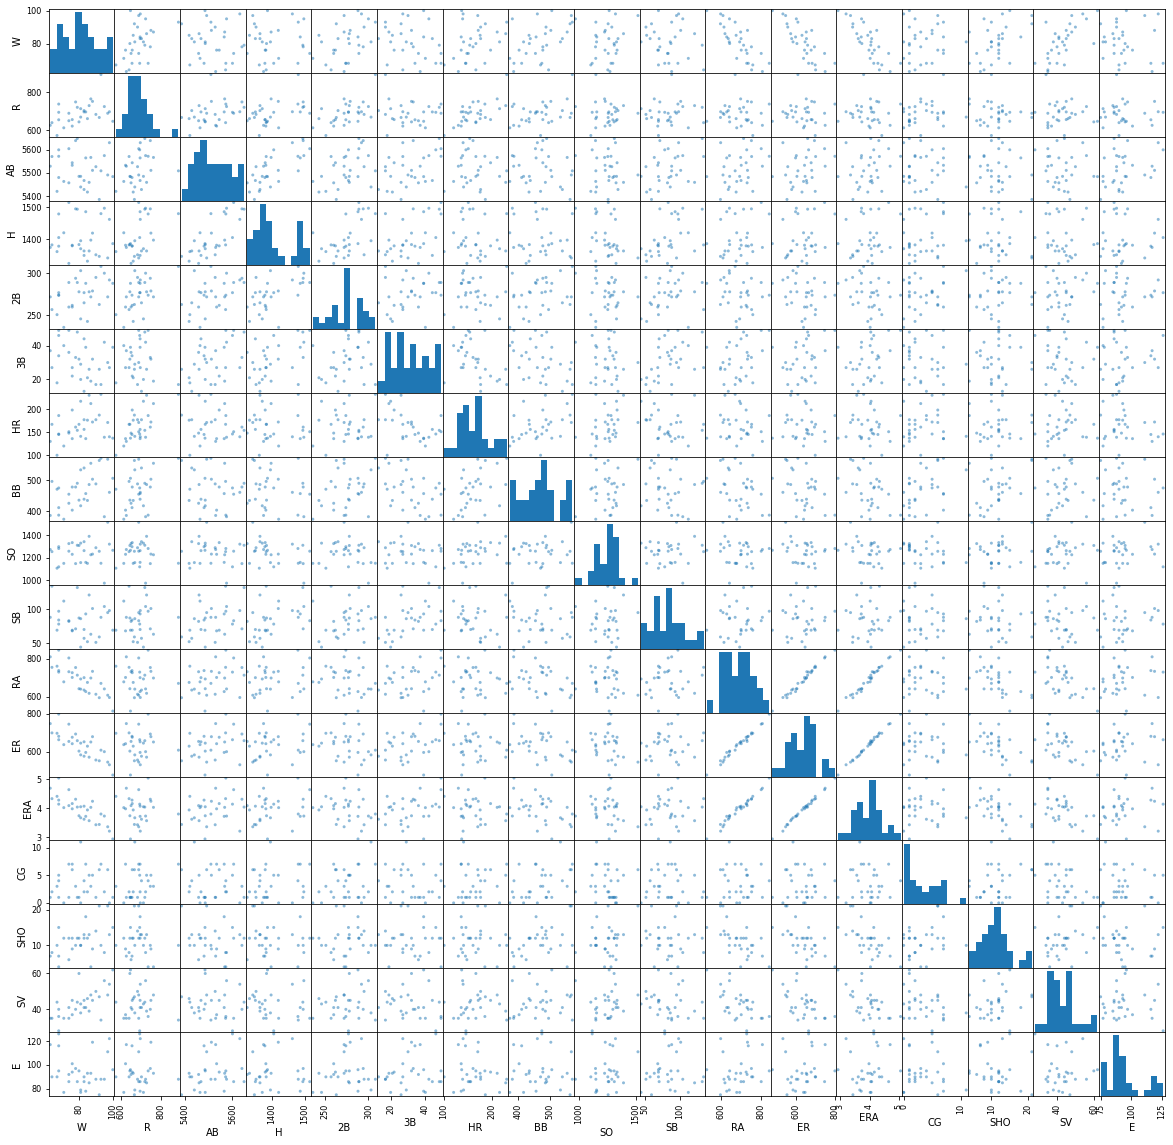

In [352]:
scatter_matrix(data,figsize=(20,20),diagonal='hist')
plt.show

- As we can see Runs Allowed, Earned Runs And Earned Runs Average are probably correlated.
- Runs has relation with each of the independent variables.

##### Multicolinearity Detection:

Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not

In [346]:
corr = data.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


##### Heat Map (Correlation Matrix):

Let's plot the heat map to visualize and find coefficient of multicolinearity:


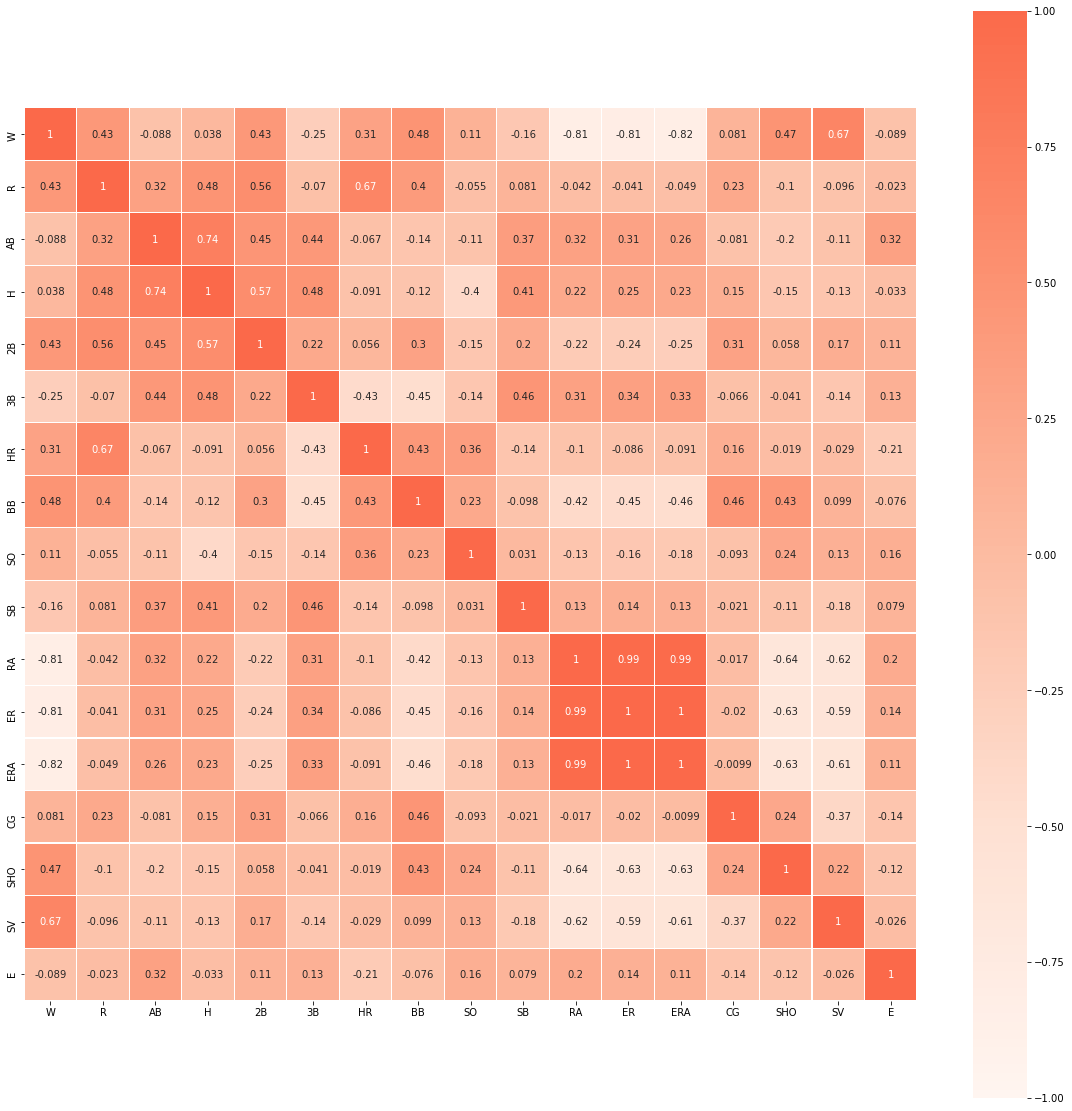

In [348]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- After seeing the Heatmap we can say there is a correlation between Runs Allowed,Earned runs and Earned Runs allowed. We are going to take care of that before model creation.

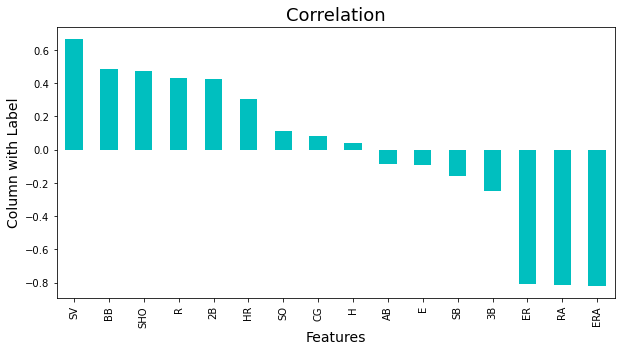

In [349]:
plt.figure(figsize=(10,5))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- At Bats, Errors, Stolen Bases, Tripples,Earned Runs, Runs Allowed, Earned Runs Average are negatively correlated with label 'Wins'

#### Data Cleaning and Outlier removal:
As some columns are having skewness, outliers and some features are correlated we are going to clean the dataset before model creation.


- As minimum value of CG is showing zero we are going to replace it with mean of the column. 

In [353]:
#replacing zero values with mean of the column:
data['CG']=data['CG'].replace(0,data['CG'].mean())

In [354]:
data.skew()  #checking the skewness

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.836848
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

##### As there are skewness is present in several columns, we are going to remove those skewness by using Log transformer.

In [24]:
data['R']=np.log(data['R'])
data['H']=np.log(data['H'])
data['CG']=np.log(data['CG'])
data['SHO']=np.log(data['SHO'])
data['SV']=np.log(data['SV'])
data['E']=np.log(data['E'])

- Now after removing the skewness we are going to check the data once again.

In [26]:
data.skew()

W      0.047089
R      0.744196
AB     0.183437
H      0.628554
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG          NaN
SHO   -0.721953
SV     0.150582
E      0.630080
dtype: float64

- The skewness is almost gone but there are little bit skewness present so, we are going to use Power Transformer for that.

In [28]:
features=['R','H','SHO','E']  #Features those having skewness

In [29]:
scaler=PowerTransformer(method='yeo-johnson')     #using power transformer

In [30]:
data[features]=scaler.fit_transform(data[features].values)

In [31]:
data[features]

,R,H,SHO,E
0,0.725869,1.612203,-0.795399,-0.332852
1,0.258393,-1.010055,0.255931,-0.530099
2,-0.247052,-0.116545,-0.245507,-1.343147
3,-1.282105,-0.369058,-0.513700,0.677879
4,0.133142,1.884141,0.255931,-0.530099
5,2.693899,1.340265,-0.245507,-0.332852
6,1.310706,-0.077697,-2.095288,0.105853
7,0.548839,-0.582724,-0.245507,-1.617608
8,-0.770249,-0.349634,0.255931,0.262346
9,1.087323,1.573354,-0.245507,0.409344


- As we can see the features are transformed and scaled. Now it's time to drop those correlated not important Columns.

In [363]:
# Drop Alert:
drop_columns=['ERA','BB','ER']
data=data.drop(columns=drop_columns,axis=1)

- Let's check the skewness before model creation:

In [364]:
data.skew()

W      0.047089
R     -0.027661
AB     0.183437
H      0.551142
2B    -0.230650
3B     0.129502
HR     0.516441
SO    -0.156065
SB     0.479893
RA     0.045734
CG    -0.308676
SHO   -0.004792
SV     0.150582
E      0.056528
dtype: float64

- As we can see the skewness is almost gone. Now it's time to divide the dataset for model creation:

In [365]:
#### dividing the feature and label for further operations:
y = data['W']
x = data.drop(columns=['W'])
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

##### Standardization:

In [366]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split)to gauge how well the Regressor is working.


In [367]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

### Model Creation:

Now we are going to build 4 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. RandomForestRegressor
4. GradientBoostingRegressor


##### 1. Linear Rgression:

In [368]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [369]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [370]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.9402943967217627


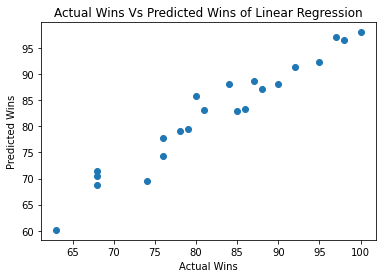

In [371]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins Vs Predicted Wins of Linear Regression')
plt.show()

In [372]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

###### Evaluation of LR:

In [373]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.7409868812537405


In [374]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  3.368042570118078


In [375]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  21.30382901687985


In [376]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  4.615607112491253


##### Scores of Linear Regression:

1. Accuracy - 0.7409868812537405
2. MAE of LR -  3.368042570118078
3. MSE of LR -  21.30382901687985
4. RMSE of LR - 4.615607112491253


#### 2. K-Neighbors Regressor:

In [377]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [378]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [379]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.5932661031769164


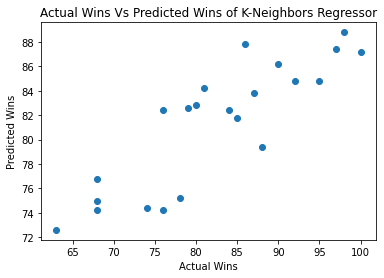

In [380]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins Vs Predicted Wins of K-Neighbors Regressor')
plt.show()

In [381]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

##### Evaluation of K-Neighbors Regressor:

In [382]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.5053495440729483


In [383]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  5.375


In [384]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  40.685


In [385]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  6.378479442625805


##### Scores of K-Neighbors Regressor:

1.    Accuracy of KNN - 0.5053495440729483
2.    MAE of KNN - 5.375
3.    MSE of KNN - 40.685
4.    RMSE of KNN - 6.378479442625805


#### 3. Random Forest Regressor:

In [388]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [389]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [390]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9326500340036918


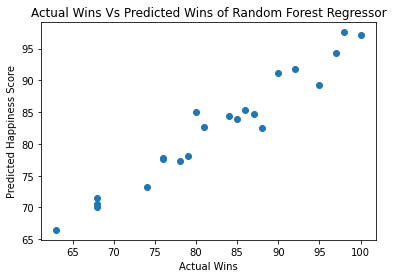

In [391]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Wins Vs Predicted Wins of Random Forest Regressor')
plt.show()

In [392]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

##### Evaluation of Random Forest Regressor:

In [393]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.41815091185410325


In [394]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  5.566250000000002


In [395]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  47.857087500000006


In [396]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  6.917881720584705


##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.41815091185410325
2.    MAE of RFR :  5.566250000000002
3.    MSE of RFR : 47.857087500000006
4.    RMSE of RFR : 6.917881720584705


#### 4. Gradient Boosting Regressor:


In [397]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [398]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [399]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.9999999713280211


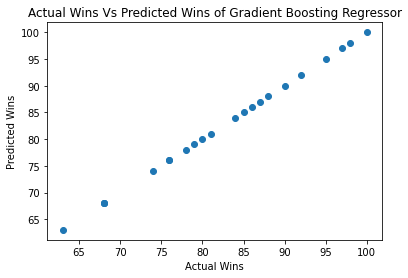

In [400]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins Vs Predicted Wins of Gradient Boosting Regressor')
plt.show()

In [401]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

##### Evaluation of Gradient Boosting Regressor:

In [402]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.4252594864772594
Accuracy of GBR : 42.52594864772594


In [403]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  5.987516985288419


In [404]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  47.27240723724542


In [405]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  6.875493235924636


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.4252594864772594
2.    MAE of GBR : 5.987516985288419
3.    MSE of GBR : 47.27240723724542
4.    RMSE of GBR : 6.875493235924636

##### Regulalization:

 When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.

##### Regularization using Lasso:

In [431]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [432]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.15014007802492085

In [433]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.15014007802492085)

In [434]:
lasso_reg.score(x_test,y_test)

0.9150263648485443

##### Regularization Using Ridge:

In [435]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [436]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.09099999999999998

In [437]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [438]:
ridge_model.score(x_test,y_test)

0.7900303171261998

- As we can see Regularization using Lasso and Ridge is very much impactful in bringing good accuracy of the model.Lasso is giving 91% and Ridge is giving 79% of accuracy.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.


##### CV of Linear Regression:

In [439]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=6,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[-1.56164707  0.49708538 -0.28772774  0.243888    0.6419057   0.88384315]
mean : 6.955790205139296


##### CV of K-Neighbors Regressor:

In [440]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.54354018 0.29253366 0.61974711 0.61763832 0.57075061]
mean : 52.884197548221834


##### CV of Random Forest Regressor:

In [441]:
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean()*100)

[0.3187617  0.66536444 0.05956636 0.85481189 0.73000042]
mean : 52.570096063721614


##### CV of Gradient Boosting Regressor:

In [443]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[-0.12911447  0.08509973 -0.17663257  0.73128601  0.80022505]
mean : 26.217275037624777


- We can see, the Cross Validation scores of each model somewhat low. So let's go with the model that has given the best accuracy and that is Linear Regression - 74%. 

#### Hyperparameter Tuning:

 Now we will use Grid Search Technique to tune the hyperparameter of Lasso. After getting the best parameters we can put those into the model to obtain the best accuracy.
 
##### parameter Tuning using GridSearchCV: 

In [448]:
lasso=Lasso()
parameters={'alpha':[0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,0.091],
            'max_iter':[100,200,500,1000],'random_state':[1],'tol':[0.0001,0.0002],'selection':['cyclic','random']}

In [449]:
lasso_regressor = GridSearchCV(lasso,parameters,cv=5) 
lasso_regressor.fit(x_train,y_train)
lasso_regressor.best_estimator_

Lasso(alpha=0.091, max_iter=100, random_state=1, selection='random', tol=0.0002)

In [450]:
lasso= Lasso(alpha=0.091, max_iter=100, random_state=1, selection='random', tol=0.0002)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)

In [451]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
89.3390938369786


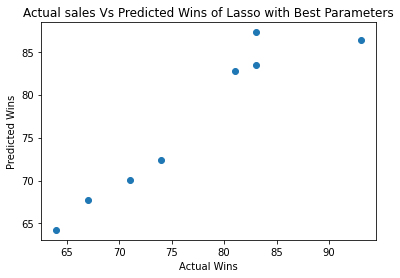

In [452]:
# Checking Actual sales Vs Predicted sales using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual sales Vs Predicted Wins of Lasso with Best Parameters')
plt.show()

##### Observation:
After hyperparameter tuning with best parameters Lasso is giving the best accuracy of 89.33%. So, we are going to save this Model for Baseball Win Prediction.

#### Observation:

In [453]:
# model prediction using Gradient Boosting Regressor
x_predict = list(lasso.predict(x_test))
lasso_baseball = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(lasso_baseball))

    predicted_values  orignal_values
5          86.313931              93
23         67.681369              67
22         70.062879              71
28         72.419130              74
1          83.476537              83
21         87.260884              83
19         64.250637              64
7          82.777245              81


In [454]:
#importing joblib
import joblib

joblib.dump(lasso,'lasso_baseball.obj')

# SAVING THE MODEL

['lasso_baseball.obj']

In [455]:
lasso_from_joblib=joblib.load('lasso_baseball.obj')
lasso_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([86.31393121, 67.68136871, 70.06287932, 72.4191296 , 83.47653691,
       87.26088391, 64.25063717, 82.77724473])

##### Conclusion:

The dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different independent variables. Those variables are:  Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.
We have checked how these independent variables are try to stimulate the number of wins. By analyzing that we got to know some variables are correlated with each other like Runs allowed is correlated with Earned runs and Earned runs average.
After analyzing the data we have made 4 models out of which Linear Regression model has given the best result before hyperparameter tuning. After tuning with Lasso it has given 89% of accuracy for the Baseball win prediction dataset.